In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import pylab as p

import statsmodels.api as sm

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.shape

(200, 4)

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [8]:
df.isnull().sum()    #checking null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
# calculate skewness
round(skew(df.TV, axis=0,bias=True),4)  #skewness of TV

-0.0693

In [10]:
round(skew(df.Radio, axis=0,bias=True),4)  #skewness of Radio

0.0935

In [11]:
round(skew(df.Newspaper, axis=0,bias=True),4)

0.888

In [12]:
round(skew(df.Sales, axis=0,bias=True),4)

-0.0732

In [13]:
# now we calculate the kurtosis
round(kurtosis(df.TV, axis=0,bias=True),4)

-1.2259

In [14]:
round(kurtosis(df.Radio, axis=0,bias=True),4)

-1.259

In [15]:
round(kurtosis(df.Newspaper, axis=0,bias=True),4)

0.6035

In [16]:
round(kurtosis(df.Sales,axis=0,bias=True),4)

-0.654

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


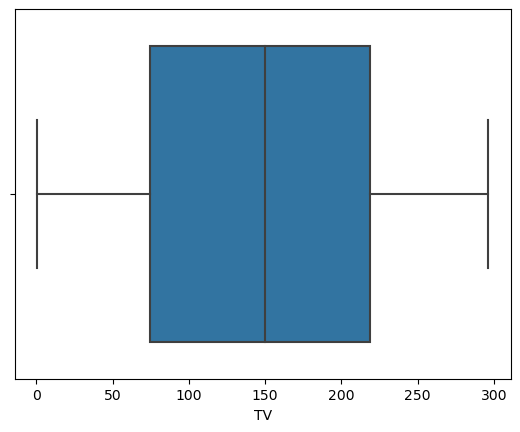

In [17]:
#outlier analysis
plt1 = sns.boxplot(df['TV'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


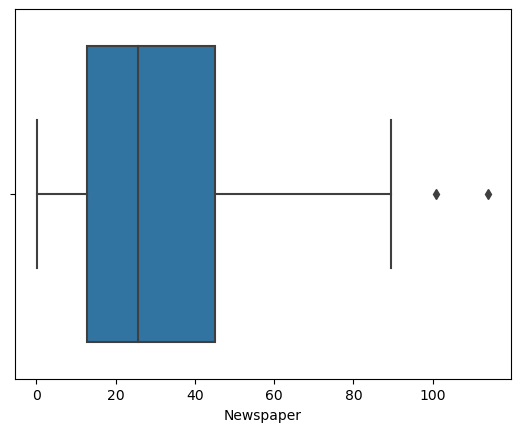

In [18]:
plt2 = sns.boxplot(df['Newspaper'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


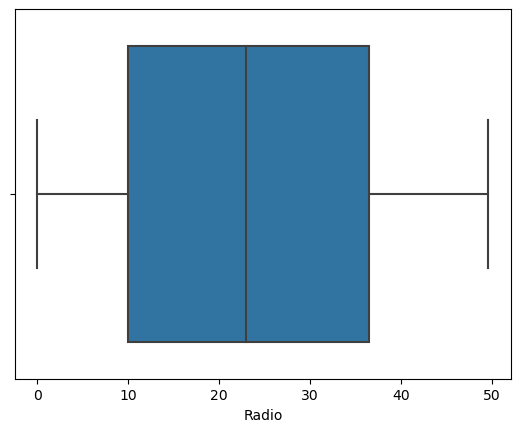

In [19]:
plt3 = sns.boxplot(df['Radio'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


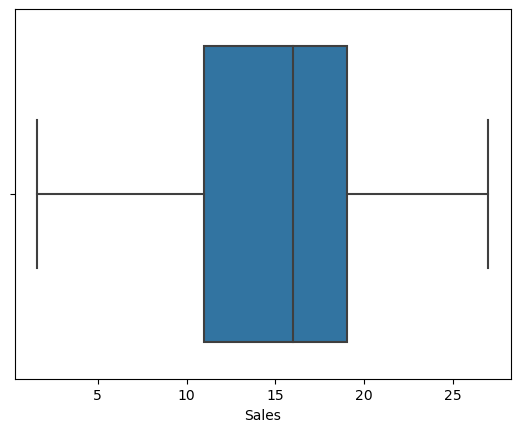

In [20]:
plt4 = sns.boxplot(df['Sales'])

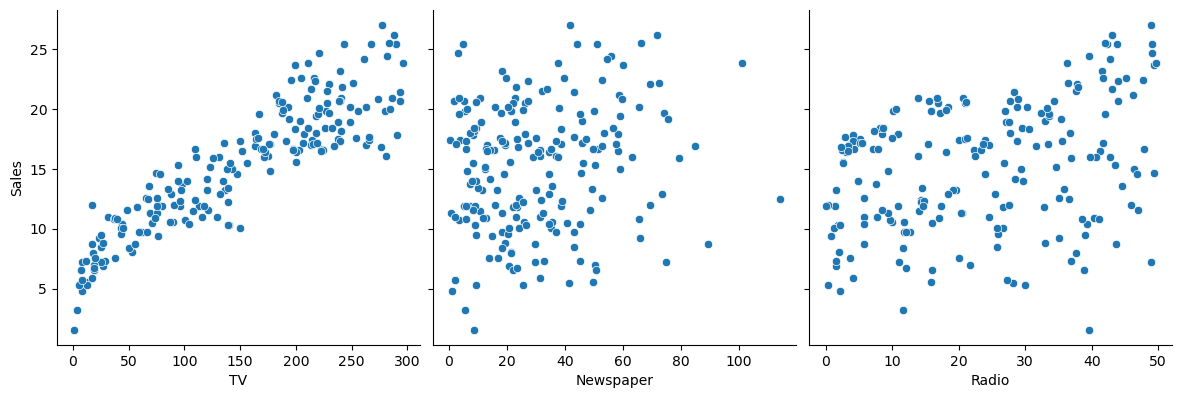

In [21]:
# lets see with the scatter plot
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height = 4,kind='scatter')

<AxesSubplot:>

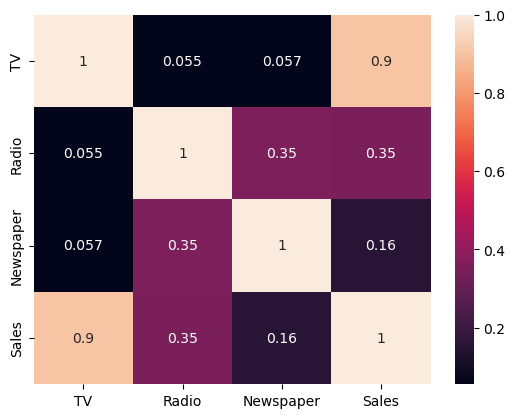

In [22]:
# lets see correlation between different variables
sns.heatmap(df.corr(),annot=True)

In [23]:
X= df["TV"]
y = df['Sales']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [25]:
X_train.head()

28     248.8
56       7.3
114     78.2
91      28.6
158     11.7
Name: TV, dtype: float64

In [26]:
y_train

28     18.9
56      5.5
114    14.6
91      7.3
158     7.3
       ... 
199    18.4
196    14.0
86     12.0
63     14.0
21     17.5
Name: Sales, Length: 150, dtype: float64

In [27]:
# add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm).fit()

In [28]:
lr.params        #print the parameters i.w. the intercept and the slope of the regressino line fitted

const    7.092404
TV       0.054003
dtype: float64

In [29]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     623.1
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           6.54e-55
Time:                        21:51:31   Log-Likelihood:                -338.02
No. Observations:                 150   AIC:                             680.0
Df Residuals:                     148   BIC:                             686.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0924      0.376     18.864      0.000       6.349       7.835
TV             0.0540      0.002     24.962      0.000       0.050       0.058
==============================================================================
Omnibus:                        0.117   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.943   Jarque-Bera (JB):                0.136
Skew:                           0.064   Prob(JB):                        0.934
Kurtosis:                       2.927   Cond. No.                         345.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

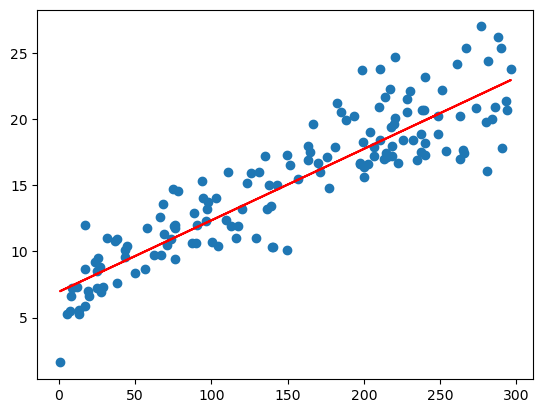

In [30]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948 + 0.054*X_train,'r')
plt.show()